In [1]:

from keras.models import Sequential
from keras.layers import Convolution1D, MaxPooling1D, Flatten,Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

In [2]:

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ddos/CICDDoS2019/cicddos2019_dataset.csv")
df.head()

Mounted at /content/drive


,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [4]:
for i in ["Label", "Class"]:
    df[i] = df[i].astype('category').cat.codes

In [5]:
def normalize(x, cols):
    result = x.copy() # do not touch the original df
    for feature_name in cols:
        max_value = x[feature_name].max()
        min_value = x[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (x[feature_name] - min_value) / (max_value - min_value)
    return result

normalized_df = pd.DataFrame(normalize(df,df.columns))

In [6]:
x = normalized_df.drop(columns="Class")
y = normalized_df['Class']

In [7]:

trainX, testX, y_train_original, y_test_original = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
trainX.shape, testX.shape, y_train_original.shape, y_test_original.shape

((345096, 79), (86275, 79), (345096,), (86275,))

In [8]:
le = LabelEncoder()
y_train = le.fit_transform(y_train_original)
y_test = le.transform(y_test_original)

In [9]:
unique_values = np.unique(y_train)
print(unique_values)

[0 1]


In [10]:

# Prepare data: Convert integer labels to one-hot
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build the CNN model
cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same", activation="relu", input_shape=(79, 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation="softmax"))

# Compile the model
cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])


# Train the model with class weights
cnn.fit(trainX, y_train, epochs=10, validation_data=(testX, y_test))


Epoch 1/10
  720/10785 [=>............................] - ETA: 5:47 - loss: 0.0323 - accuracy: 0.9884

KeyboardInterrupt: 

In [ ]:
class_names = ['Dos','Normal']

In [ ]:
predictions = cnn.predict(testX)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

2697/2697 [==============================] - 13s 5ms/step


In [ ]:

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     66709
      Normal       1.00      1.00      1.00     19566

    accuracy                           1.00     86275
   macro avg       1.00      1.00      1.00     86275
weighted avg       1.00      1.00      1.00     86275



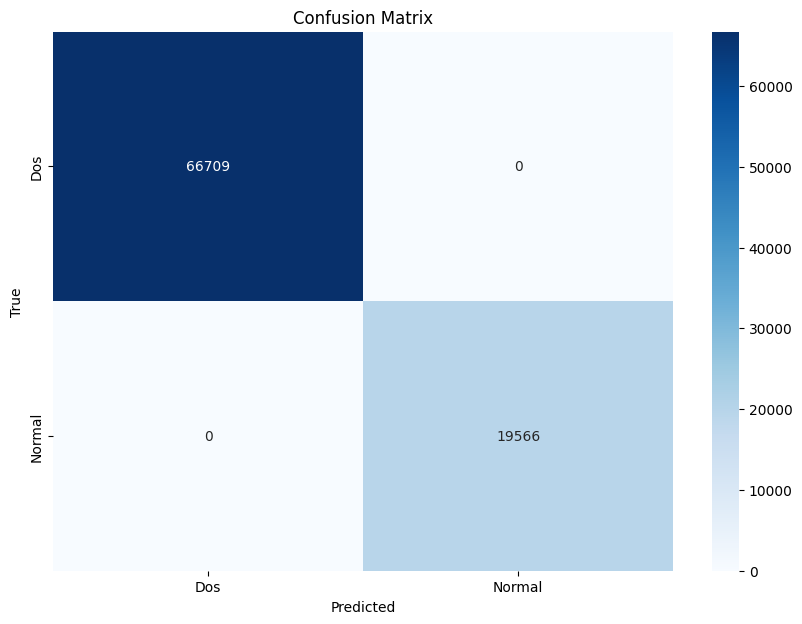

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
